### Exercise Sheet 6

**Exercise 1 - NMF Clustering**

**1. Write an algorithm to showcase the working of Non-negative matrix factorization (NMF)**

**Input:** Non-negative matrix $X_{nxm}$ (where n represents features and m represents data point) and factorization rank $k$ (selected such that $(n+m)r<nm$)


**Output:** Non-negative matrices $W_{nxk}$ and $H_{kxm}$

**Objective:** Minimise the below objective function by alternating minimizations of $W$ and $H$:
$$
D(X||WH) = \sum_{ij}\left( x_{ij}\log\frac{x_{ij}}{w_{ij}H_{ij}}-x_{ij}+w_{ij}\right)
$$

**Algorithm**:
1. Generate initial non-negative matrices $W^{0}$ and $H^{0}$ using an initialization algorithm(eg. random initialization).
2. Loop from $t=0$ until $W^{t-1} = W^{t},H^{t-1} = H^{t}$(i.e W and H converge) or until $t==$ max. iterations
    1. Update elements of the matrix $W^{t}$
        $$
        w_{ik}= w_{ik} \frac{\frac{\sum_{j=1}^{p}h_{kj}x_{ij}}{(WH)_{ij}}}{\sum_{j=1}^{p}h_{kj}}
        $$
    2. Update elements of the matrix $H^{t}$
        $$
        h_{kj}= h_{kj} \frac{\frac{\sum_{i=1}^{N}w_{ik}x_{ij}}{(WH)_{ij}}}{\sum_{i=1}^{N}w_{ik}}
        $$
3. end loop


**2. Mention the pros and cons of NMF as well as one of its applications.**

**Advantages of NMF:**
- It is useful for **high dimensional data** as it extracts **sparse and meaningful features** from non-negative data vectors.
- It is a **biclustering** algorithm as it performs both **feature selection** and **clustering**. The sparse NMF enforces sparsity on the factor matrices which results in identification of sparse set of features specific for each cluster in the factor matrices.
- It is **not distance based**.

**Disadvantages of NMF:**
- It can only detect **linearly separable clusters**.
- It is **computationally demanding**.
- The procedure is prone to **random initialization**. Hence we may get different clusters depending on initialization. This problem can be tackled by performing NMF multiple times and analysing the consensus matrix.

**Applications:**
1. **Text Mining** - NMF can be used for text mining in areas such as topic modeling, document clustering, topic detection and trend tracking, email analysis.
2. **Image Analysis and Computer Vision** - NMF is also applied in feature representation for facial feature extraction and video tracking. 

**3. Use the nimfa package for NMF clustering on gene expression data to cluster
genes into groups. Use the parameters (10 ranks, 50 maximum iterations and 25
runs) to compute the following:**

In [43]:
import nimfa
import numpy as np
import scipy.sparse as sparse
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

In [46]:
# load the dataset
gene_expression_data = pd.read_csv('allData.csv', index_col='Unnamed: 0')

# Dataset contains data for 5000 genes and 128 patients
gene_expression_data

,36638_at,39318_at,38514_at,266_s_at,38585_at,41266_at,36108_at,39389_at,31525_s_at,32612_at,...,37655_at,1440_s_at,32260_at,40070_at,1056_s_at,39200_s_at,36105_at,32578_at,39383_at,33718_at
01005,0.583368,0.535258,0.642984,0.891901,0.269871,0.605566,0.069070,0.938101,0.314737,0.590410,...,0.884590,0.399443,0.379796,0.272379,0.216088,0.355740,0.167203,0.438651,0.395720,0.273593
01010,0.505321,0.704177,0.913612,0.657634,0.402911,0.429698,0.803187,0.360471,0.718665,0.773198,...,0.086277,0.432789,0.431440,0.461242,0.443493,0.291054,0.102883,0.584035,0.589994,0.401375
03002,0.375805,0.073716,0.707562,0.847162,0.792428,0.819212,0.644334,0.735292,0.828776,0.821131,...,0.750758,0.305592,0.444996,0.293573,0.318939,0.259713,0.271869,0.556874,0.931118,0.301529
04006,1.000000,0.226960,0.119596,0.394317,0.115411,0.050117,0.440698,0.649291,0.498758,0.692290,...,0.090901,0.365967,0.170796,0.565408,0.456499,0.407845,0.100038,0.670769,0.541601,0.659517
04007,0.890125,0.631314,0.518785,0.880312,1.000000,0.858408,0.638519,0.933899,0.963169,0.818224,...,0.340640,0.285412,0.561193,0.470224,0.468927,0.243284,0.467118,0.571348,0.425701,0.196066
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56007,0.072759,0.068235,0.473041,0.239455,0.223252,0.280791,0.082024,0.133053,0.768916,0.158638,...,0.371955,0.343000,0.415382,0.351072,0.351224,0.513185,0.136617,0.558943,0.225453,0.291071
64005,0.053972,0.086147,0.000065,0.136057,0.488365,0.470852,0.053909,0.116930,0.861130,0.136765,...,0.359889,0.557229,0.388962,0.375595,0.298626,0.584230,0.079315,0.353649,0.185538,0.461440
65003,0.136163,0.082575,0.456977,0.120866,0.216307,0.239017,0.069328,0.164105,0.565675,0.102278,...,0.720453,0.632587,0.652855,0.336831,0.153023,0.757112,0.179819,0.494060,0.277194,0.224542
83001,0.022913,0.026321,0.774337,0.135344,0.379465,0.544207,0.049219,0.015351,0.724584,0.139954,...,0.768953,0.357137,0.396453,0.674790,0.207006,0.287185,0.063400,0.327525,0.157277,0.337916


In [47]:
# transpose the matrix so that gene expression features are present along row and patient samples
# are present along column, since NMF algorithms require features to be present along rows and
# samples present along columns
gene_expression_data = gene_expression_data.T
gene_expression_data

,01005,01010,03002,04006,04007,04008,04010,04016,06002,08001,...,37001,43006,43015,44001,49004,56007,64005,65003,83001,LAL4
36638_at,0.583368,0.505321,0.375805,1.000000,0.890125,0.015269,0.198995,0.262746,0.000000,0.806019,...,0.027652,0.068056,0.007161,0.122048,0.092802,0.072759,0.053972,0.136163,0.022913,0.060686
39318_at,0.535258,0.704177,0.073716,0.226960,0.631314,0.200666,0.838839,0.182013,0.128862,0.530119,...,0.062598,0.000000,0.084411,0.105926,0.016825,0.068235,0.086147,0.082575,0.026321,0.091866
38514_at,0.642984,0.913612,0.707562,0.119596,0.518785,0.499243,0.961742,0.564457,0.414330,0.193236,...,0.028387,0.032067,0.475572,0.137729,0.174771,0.473041,0.000065,0.456977,0.774337,0.710210
266_s_at,0.891901,0.657634,0.847162,0.394317,0.880312,0.765667,0.947758,0.691745,0.764316,0.848112,...,0.121269,0.207306,0.314549,0.394670,0.229842,0.239455,0.136057,0.120866,0.135344,0.218240
38585_at,0.269871,0.402911,0.792428,0.115411,1.000000,0.403957,0.260541,0.713319,0.750092,0.353165,...,0.090015,0.361349,0.579401,0.589813,0.391055,0.223252,0.488365,0.216307,0.379465,0.302652
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39200_s_at,0.355740,0.291054,0.259713,0.407845,0.243284,0.128293,0.031399,0.242241,0.189463,0.209857,...,0.824010,0.401604,0.307126,0.786371,0.667020,0.513185,0.584230,0.757112,0.287185,0.869236
36105_at,0.167203,0.102883,0.271869,0.100038,0.467118,0.087408,0.037803,0.040205,0.067514,0.832290,...,0.077438,0.053277,0.036336,0.085945,0.095217,0.136617,0.079315,0.179819,0.063400,0.174480
32578_at,0.438651,0.584035,0.556874,0.670769,0.571348,0.783195,0.368541,0.647977,0.344752,0.620702,...,0.500273,0.803330,0.348018,0.337211,0.483741,0.558943,0.353649,0.494060,0.327525,0.364662
39383_at,0.395720,0.589994,0.931118,0.541601,0.425701,0.355726,0.545177,0.979197,0.437345,0.354057,...,0.088411,0.044582,0.089474,0.031904,0.367632,0.225453,0.185538,0.277194,0.157277,0.237925


In [56]:
# creating Standard NMF model for data with 10 ranks, 50 maximum iterations and 25 runs
nmf_model = nimfa.Nmf(
    V = gene_expression_data.to_numpy(), # target matrix, we convert dataframe to matrix
    rank = 10, # factorization rank
    max_iter = 50, # max factorization iterations
    n_run = 25, # runs of the algorithm
    track_factor=True, # enable track_factor to compute connectivity matrix across multiple runs
)

# instantiate model
nmf_fit = nmf_model()

# model summary
print(nmf_fit.summary())

0.8747599355267464


**a. From the average connectivity matrix across multiple runs compute consensus matrix.**

In [50]:
# consensus matrix
print( 'Consensus Matrix')
consensus_matrix = nmf_model_summary['consensus']
consensus_matrix

Consensus Matrix


matrix([[1.0000000e+00, 8.8817842e-18, 4.4000000e-01, ..., 8.8817842e-18,
         4.0000000e-02, 8.8817842e-18],
        [8.8817842e-18, 1.0000000e+00, 8.8817842e-18, ..., 8.8817842e-18,
         8.0000000e-02, 4.0000000e-02],
        [4.4000000e-01, 8.8817842e-18, 1.0000000e+00, ..., 8.8817842e-18,
         8.8817842e-18, 8.8817842e-18],
        ...,
        [8.8817842e-18, 8.8817842e-18, 8.8817842e-18, ..., 1.0000000e+00,
         1.6000000e-01, 4.0000000e-01],
        [4.0000000e-02, 8.0000000e-02, 8.8817842e-18, ..., 1.6000000e-01,
         1.0000000e+00, 1.2000000e-01],
        [8.8817842e-18, 4.0000000e-02, 8.8817842e-18, ..., 4.0000000e-01,
         1.2000000e-01, 1.0000000e+00]])

**b. Produce a heatmap with a dendrogram from the clustering results you obtained.**

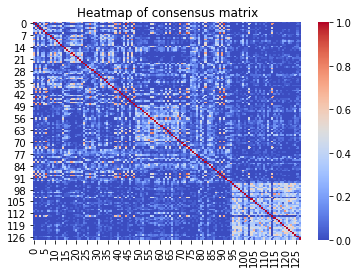

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\matrix.py:659: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


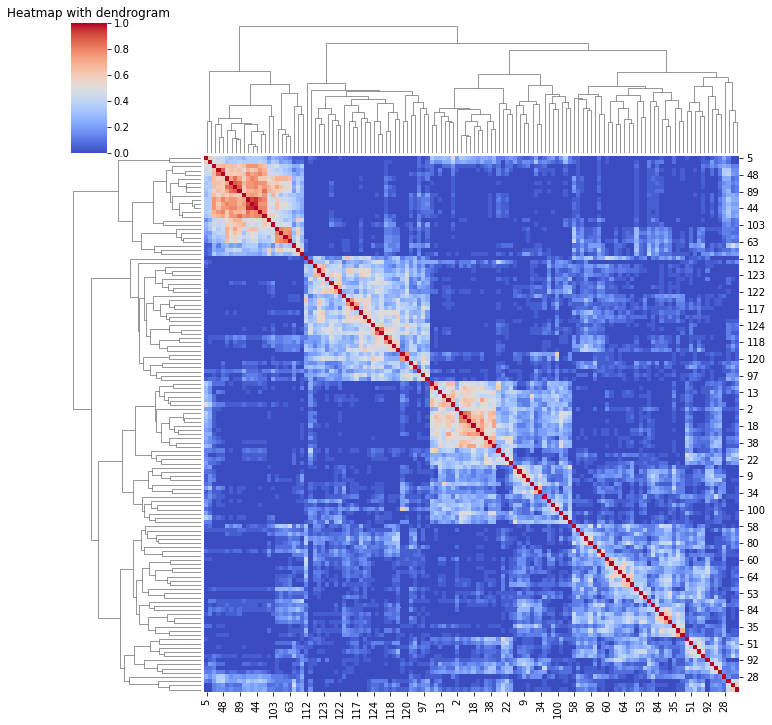

In [51]:
# heatmap of consensus matrix
plt.title('Heatmap of consensus matrix')
sns.heatmap(consensus_matrix, cmap='coolwarm')
plt.show()
# heatmap with dendrogram
sns.clustermap(consensus_matrix, cmap='coolwarm')
plt.title('Heatmap with dendrogram')
plt.show()

**c. What are the consequences of selecting a rank value that is too small or
too large? Implement a method showing how you can optimize the value
of the rank to be used.**

The rank indicates the no. of clusters into which the data will be divided. It defines the size of the new subspace i.e the no. of features to be extracted. If rank is too low we will miss features and if rank is too large we will model noise. Hence its important to pick an optimal rank which reduces the noise in the data and effectively models the features.

We can optimise the value of rank by running the NMF algorithm on data and measuring the quality of clustering based on different quality metrics. The rank corresponding to the best quality clustering can then be selected.

In [79]:
# method to find the optimum rank value using cophenetic correlation coefficient
def get_optimum_rank(candidate_ranks = [8, 10], data = None, quality_metric = 'cophenetic'):
    '''
    This method selects the optimum rank value from the
    list of candidate ranks. The optimum rank value is the rank which
    produces a clustering having the highest value of the quality metric.
    
    Parameters:
    candidate_ranks -  The list of candidate ranks which will be tested to find the optimum rank,
    data - The data to be clustered,
    quality_metric - The metric used to asses the quality of the clustering produced by the rank.
    We assess the quality of the clustering using cophenetic correlation 
    '''
    
    # initialise best_rank and quality metric result
    best_rank = candidate_ranks[0]
    quality_metric_results = []
    
    # iterate over all candidate ranks
    for candidate_rank in candidate_ranks:
        
        # perform NMF clustering with candidate rank
        nmf_model = nimfa.Nmf(
            V = data.to_numpy(),
            rank = candidate_rank,
            max_iter = 50,
            n_run = 35,
            track_factor=True,
        )
        nmf_fit = nmf_model()
        
        # choose highest rank before cophenetic correlation starts dropping
        if( 0 < len(quality_metric_results) and quality_metric_results[- 1] > nmf_fit.summary()['cophenetic'] ):
            break
        else:
            best_rank = candidate_rank
            
        quality_metric_results.append(nmf_fit.summary()['cophenetic'])
        
    return best_rank
    
print( 'Optimum rank ', get_optimum_rank(candidate_ranks = [2, 3, 10], data = gene_expression_data))   

0.8748977769628891
0.9063919399644536
0.848910480390319
Optimum rank  3


**4. Inform yourself about Non-Negative Matrix Tri-Factorization (NMTF). What is the
primary difference between NMF and NMTF and what does it achieve?**

**5. PCA and NMF are both matrix factorization methods, how do they differ from
each other? Describe a situation where PCA is favored over NMF.**

**Difference between PCA and NMF:**
- PCA does not impose non-negativity constraint on the input matrix.
- PCA imposes weak orthogonality constraint, resulting in a very distributed representation that uses cancellations to generate variability.
- NMF provides more intuitive decomposition of data and hence is more interpretable as compared to PCA

- Both PCA and NMF can be considered as unsupervised dimensionality reduction techniques.
- PCA is "holistic" hence difficult to interpret. NMF is "part-based" hence easier to interpret
- PCA uses orthogonal vectors with negative and positive coefficients. NMF only uses positive coefficients


PCA can be preferred over NMF in the following scenarios:
- PCA will be the preferred method if the dataset has negative values since NMF can only handle non-negative input matrix.

**Exercise 2 - Machine Learning**

**1. The type of machine learning (e.g. supervised learning, unsupervised learning,
etc.) applied depends on the problem at hand. Assume that we have an
Alzheimer's disease (AD) dataset where rows represent 500 participants and
columns represent 100 different collected measurements for each participant.**

**a) You are asked to train a model that can predict whether a participant is
healthy or AD. Mention the type of machine learning you would use for this
case scenario and elaborate.**

I will prefer to use **supervised machine learning** algorithms (eg. Logistic Regression) to predict whether the patient is healthy or AD. I consider this as a supervised learning problem as I am assuming that the training data contains labels(healthy or AD) for each patient and our requirement is to construct a model that can correctly classify be learning from labeled training data. We are not interested in the different clusters into which the patients or features can be divided based on the data hence unsupervised learning does not seem appropriate.

**b) Assume that we do not have any information about the diagnosis of each
participant. This time we would like to divide our participants into groups
based on the features that we have in hand. What type of machine
learning would be appropriate for this scenario and elaborate?**

**Unsupervised machine learning** is suitable in this scenario. Since we are not aware of the diagnosis of each participant, we cannot use supervised machine learning. Unsupervised machine learning teachniques ( eg. hierarchical clustering, k-means clustering, GMMs, NMF) would be appropriate to identify inherent structures in the data and divide participants into groups.

**c) Imagine that the shape of our dataset is (100, 600), mention one
pre-processing step that you would take to carry out the tasks (a) and (b)?**

The shape of our dataset indicates that we have 100 samples and 600 features. The no. of features in the dataset is very large as compared to samples. To deal with this high dimensional data, we can apply dimensionality reduction technique of Principal Component Analysis as a pre-processing step. We can then select the no. of Principal Components to represent our data and apply machine learning tasks (a) and (b) on the selected Principal Components.

**2) Generate a pipeline in scikit learn using the following code snippet,**

**Note for Tutors:** Added OneHotEncoder in Pipline given in the question. This was done to handle the categorical variable "Species" in the dataset

In [24]:
from sklearn.preprocessing import PolynomialFeatures, OneHotEncoder
from sklearn.linear_model  import LinearRegression, LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import explained_variance_score, mean_absolute_error, r2_score, mean_squared_error, classification_report
import re

polynomial_features = PolynomialFeatures(degree=15, include_bias=False)

linear_regression = LinearRegression()

# one_hot_encoder = OneHotEncoder()

pipeline = Pipeline([
# ("one_hot_encoder", one_hot_encoder),
("polynomial_features", polynomial_features),
("linear_regression", linear_regression)
])

**a) Using the Fish dataset provided, identify the quality of fit of the pipeline for
the dataset (use the weight as the response variable).**

In [25]:
# load dataset
fish_dataset = pd.read_csv('Fish.csv')

# Categorical feature in dataset
print(fish_dataset['Species'].value_counts())

y = fish_dataset['Weight']
X = fish_dataset.drop(columns = ['Weight', 'Species'])

# split training and testing data
X_train, X_test, y_train, y_test = train_test_split(X,y)

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64


In [26]:
pipeline.fit(X_train, y_train)

# predict using pipline
y_predicted = pipeline.predict(X_test)

In [27]:
# evaluate results
print(f'Explained Variance: {explained_variance_score(y_test, y_predicted)}')
print(f'Mean Absolute Error: {mean_absolute_error(y_test, y_predicted)}')
print(f'R2 Score: {r2_score(y_test, y_predicted)}')
print(f'Mean Squared Error: {mean_squared_error(y_test, y_predicted)}')

Explained Variance: -260638518.36627746
Mean Absolute Error: 1287743.5415028569
R2 Score: -269071709.96716535
Mean Squared Error: 28563066550909.438


**b) If the pipeline produces a badly fit model for the dataset, list some
methods to improve the model.**

The model has been a bad fit as indicated by explained variance score, mean absolute error, R^2 score and mean squared error.


Methods to improve the model:
- Remove the Polynomial Features preprocessing step from pipeline
- Perform PCA to decorrelate features
- Use regularization techniques and perform Lasso or Ridge Regression

**3. In this exercise we will compare the accuracy of different methods on a
high-dimensional (p>>n) dataset. Load the leukemia_small.csv and extract the
class labels from the column names (2 classes, “AML” and “ALL”)
Randomly split the data into 70% training and 30% test.
Hint: Use the train_test_split function from scikit-learn to define the test_size and
set random_state=1 for better reproducibility.**

In [28]:
# load dataset
leukemia_dataset = pd.read_csv('leukemia_small.csv')


X = leukemia_dataset.T
y = [re.sub('\.[0-9][0-9]*', '', original_str) for original_str in list(X.index.values)]
y

# split training and testing data
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 1, test_size = 0.3, train_size = 0.7)

**a) Fit a logistic regression (no penalization)**

In [38]:
lg_classifier = LogisticRegression(penalty = 'none').fit(X_train, y_train)
y_train_predicted_no_penalty = lg_classifier.predict(X_train)
y_test_predicted_no_penalty = lg_classifier.predict(X_test)

# accuracy score for plot
lg_train_accuracy_score = lg_classifier.score(X_train, y_train)
lg_test_accuracy_score = lg_classifier.score(X_test, y_test)

**b) Fit multiple l1-penalized logistic regressions (lambdas = 0.001, 0.01, 0.1,
1, 10, 100)**

In [39]:
lambdas = [0.001, 0.01, 0.1, 1, 10, 100]

l1_penalty_classifiers = []
y_train_predicted_l1_penalty = []
y_test_predicted_l1_penalty = []
l1_train_accuracy_score = []
l1_test_accuracy_score = []

for i in range(len(lambdas)):
    l1_penalty_classifiers.append(
        LogisticRegression(
            penalty = 'l1',
            solver = 'liblinear',
            C = (1/lambdas[i])
        ).fit(X_train, y_train))
    
    # record performance
    y_train_predicted_l1_penalty.append(l1_penalty_classifiers[i].predict(X_train))
    y_test_predicted_l1_penalty.append(l1_penalty_classifiers[i].predict(X_test))
    
    # accuracy score for plot
    l1_train_accuracy_score.append(l1_penalty_classifiers[i].score(X_train, y_train))
    l1_test_accuracy_score.append(l1_penalty_classifiers[i].score(X_test, y_test))

**c) Fit multiple l2-penalized logistic regressions (lambdas = 0.001, 0.01, 0.1,
1, 10, 100)**

In [40]:
lambdas = [0.001, 0.01, 0.1, 1, 10, 100]

l2_penalty_classifiers = []
y_train_predicted_l2_penalty = []
y_test_predicted_l2_penalty = []
l2_train_accuracy_score = []
l2_test_accuracy_score = []

for i in range(len(lambdas)):
    l2_penalty_classifiers.append(
        LogisticRegression(
            penalty = 'l2',
            C = (1/lambdas[i])
        ).fit(X_train, y_train))
    
    # record performance
    y_train_predicted_l2_penalty.append(l2_penalty_classifiers[i].predict(X_train))
    y_test_predicted_l2_penalty.append(l2_penalty_classifiers[i].predict(X_test))
    
    # accuracy score for plot
    l2_train_accuracy_score.append(l2_penalty_classifiers[i].score(X_train, y_train))
    l2_test_accuracy_score.append(l2_penalty_classifiers[i].score(X_test, y_test))
    
    

**d) For the models from (a), (b), and (c) measure the performance on the
training and test set**

In [69]:
print('Unpenalised Logistic Regression')
# print( 'Training Data Performance')
# print(classification_report(y_train, y_train_predicted_no_penalty))
print( 'Testing Data Performance')
print(classification_report(y_test, y_test_predicted_no_penalty))

print('l1 penalised Logistic Regression')
for i in range(len(lambdas)):
    print(f'Lambda: {lambdas[i]}')
#     print( 'Training Data Performance')
#     print(classification_report(y_train, y_train_predicted_l1_penalty[i]))
    print( 'Testing Data Performance')
    print(classification_report(y_test, y_test_predicted_l1_penalty[i]))

print('l2 penalised Logistic Regression')
for i in range(len(lambdas)):
    print(f'Lambda: {lambdas[i]}')
#     print( 'Training Data Performance')
#     print(classification_report(y_train, y_train_predicted_l2_penalty[i]))
    print( 'Testing Data Performance')
    print(classification_report(y_test, y_test_predicted_l2_penalty[i]))


Unpenalised Logistic Regression
Testing Data Performance
              precision    recall  f1-score   support

         ALL       1.00      0.79      0.88        14
         AML       0.73      1.00      0.84         8

    accuracy                           0.86        22
   macro avg       0.86      0.89      0.86        22
weighted avg       0.90      0.86      0.87        22

l1 penalised Logistic Regression
Lambda: 0.001
Testing Data Performance
              precision    recall  f1-score   support

         ALL       1.00      0.86      0.92        14
         AML       0.80      1.00      0.89         8

    accuracy                           0.91        22
   macro avg       0.90      0.93      0.91        22
weighted avg       0.93      0.91      0.91        22

Lambda: 0.01
Testing Data Performance
              precision    recall  f1-score   support

         ALL       1.00      0.86      0.92        14
         AML       0.80      1.00      0.89         8

    accuracy   

**e) Using (d) report the performances with one scatterplot for each approach
(1 scatterplot for unpenalized, l1, l2), with the regularization constant on
the x-axis and the accuracy on the y-axis, train and test set colored
differently, proper axis labels and a legend.**

In [42]:
# The unpenalised Logistic Regression has no regularization constant since it is unpenalized
# @TODO after discussion - scatter plot for unpenalized Logistic Regression


Text(0, 0.5, 'Accuracy')

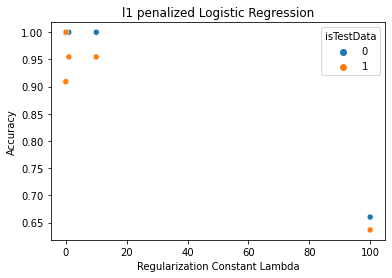

In [64]:
# scatter plot for l1 penalized logistic regression

# prepare dataframe for results
train_results_list = list(zip(lambdas, l1_train_accuracy_score, [0] * len(lambdas)))
test_results_list = list(zip(lambdas, l1_test_accuracy_score, [1] * len(lambdas)))
l1_results_dataframe = pd.DataFrame(train_results_list + test_results_list, columns = ['lambda', 'accuracy', 'isTestData'])

sn.scatterplot(x = 'lambda', y = 'accuracy', data = l1_results_dataframe, hue = 'isTestData')
plt.title('l1 penalized Logistic Regression')
plt.xlabel('Regularization Constant Lambda')
plt.ylabel('Accuracy')

,lambda,accuracy,isTestData
0,0.001,1.000000,0
1,0.010,1.000000,0
2,0.100,1.000000,0
3,1.000,1.000000,0
4,10.000,1.000000,0
5,100.000,1.000000,0
6,0.001,0.863636,1
7,0.010,0.954545,1
8,0.100,1.000000,1
9,1.000,1.000000,1


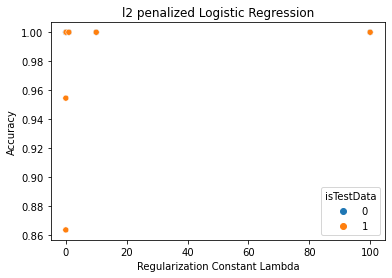

In [66]:
# scatter plot for l2 penalized logistic regression

# prepare dataframe for results
train_results_list = list(zip(lambdas, l2_train_accuracy_score, [0] * len(lambdas)))
test_results_list = list(zip(lambdas, l2_test_accuracy_score, [1] * len(lambdas)))
l2_results_dataframe = pd.DataFrame(train_results_list + test_results_list, columns = ['lambda', 'accuracy', 'isTestData'])

sn.scatterplot(x = 'lambda', y = 'accuracy', data = l2_results_dataframe, hue = 'isTestData')
plt.title('l2 penalized Logistic Regression')
plt.xlabel('Regularization Constant Lambda')
plt.ylabel('Accuracy')
l2_results_dataframe

**f) Which method in combination with which parameter gives the best results
on the test set?**

The best results on the test set are obtained by using penalized Logistic Regression models. By analysing the classification report containing precision, recall and f1 score, it can be seen that the **l1 penalized Logistic Regression** algorithm performs perfect classification with **lambda = 0.1** and the **l2 penalized Logistic Regression** performs perfect classification with **lambda=0.1, 1, 10, 100**.